In [13]:
##################################

# FIND OPTIMAL K SELECTED FEATURES 

##################################

In [14]:
# 05/02/2025
from ipynb.fs.full.main import controller
from ipynb.fs.full.performance import performanceEval


"""
{
    k: {
        "model1": acc,
        "model2": acc,
        ...
    },
    k2: { ... },
    ...
    k_n,
    "kOptimal": {
      "model1": kO,
      "model2": kO,
      ...
    }

}
"""
def findOptimalK(metric = "accuracy", n = 30, tauRed = 0.8, models = ["regModel", "svmModel", "nbcModel", "knnModel", "dtModel"]):
  featuresResults = {"kOptimal": {}}
  res = controller(inFile = "data", procs = ["clean", "predMap"], inTestSize = 0.2, run = False);
  df = res["df"]
  for k in range(n+1):
    if k == 0: continue; # can't have 0 features
    resCtrl = controller(inFile = None, inputDF = df, procs = ["CFS", "splitSet"], k = k, tauRed = tauRed, inTestSize = 0.2, run = True)
    Ypreds = resCtrl["Ypreds"]
    Ytest = resCtrl["Ytest"]
    featuresResults[k] = {}
    for model in models:
      perfm = performanceEval(Ytest, Ypreds["Ypred_" + model], model)
      featuresResults[k][model] = perfm[metric]
      if k == 1:
        featuresResults["kOptimal"][model] = k
      else:
        currentkO = featuresResults["kOptimal"][model]
        currentBestAcc = featuresResults[currentkO][model]
        if currentBestAcc < perfm[metric]: featuresResults["kOptimal"][model] = k

  return featuresResults

In [15]:
import pandas as pd

df = pd.read_csv("data.csv")
res = findOptimalK(metric = "accuracy", n = len(df.columns) - 2) # -2 bc dw id and diagnosis 
res

Selected features: ['concave points_worst']
Num features: 1
regModel  accuracy (in %): 83.33333333333334
Predicted   0   1  All
Actual                
0          75   0   75
1          19  20   39
All        94  20  114
svmModel  accuracy (in %): 90.35087719298247
Predicted   0   1  All
Actual                
0          72   3   75
1           8  31   39
All        80  34  114
nbcModel  accuracy (in %): 91.22807017543859
Predicted   0   1  All
Actual                
0          71   4   75
1           6  33   39
All        77  37  114
knnModel  accuracy (in %): 89.47368421052632
Predicted   0   1  All
Actual                
0          72   3   75
1           9  30   39
All        81  33  114
dtModel  accuracy (in %): 85.96491228070175
Predicted   0   1  All
Actual                
0          68   7   75
1           9  30   39
All        77  37  114
Selected features: ['concave points_worst', 'radius_worst']
Num features: 2
regModel  accuracy (in %): 95.6140350877193
Predicted   0   1  Al

{'kOptimal': {'regModel': 4,
  'svmModel': 4,
  'nbcModel': 6,
  'knnModel': 6,
  'dtModel': 5},
 1: {'regModel': 83.33333333333334,
  'svmModel': 90.35087719298247,
  'nbcModel': 91.22807017543859,
  'knnModel': 89.47368421052632,
  'dtModel': 85.96491228070175},
 2: {'regModel': 95.6140350877193,
  'svmModel': 97.36842105263158,
  'nbcModel': 95.6140350877193,
  'knnModel': 95.6140350877193,
  'dtModel': 94.73684210526315},
 3: {'regModel': 93.85964912280701,
  'svmModel': 95.6140350877193,
  'nbcModel': 94.73684210526315,
  'knnModel': 92.10526315789474,
  'dtModel': 92.10526315789474},
 4: {'regModel': 98.24561403508771,
  'svmModel': 98.24561403508771,
  'nbcModel': 95.6140350877193,
  'knnModel': 94.73684210526315,
  'dtModel': 95.6140350877193},
 5: {'regModel': 98.24561403508771,
  'svmModel': 98.24561403508771,
  'nbcModel': 95.6140350877193,
  'knnModel': 94.73684210526315,
  'dtModel': 96.49122807017544},
 6: {'regModel': 98.24561403508771,
  'svmModel': 98.24561403508771,
 

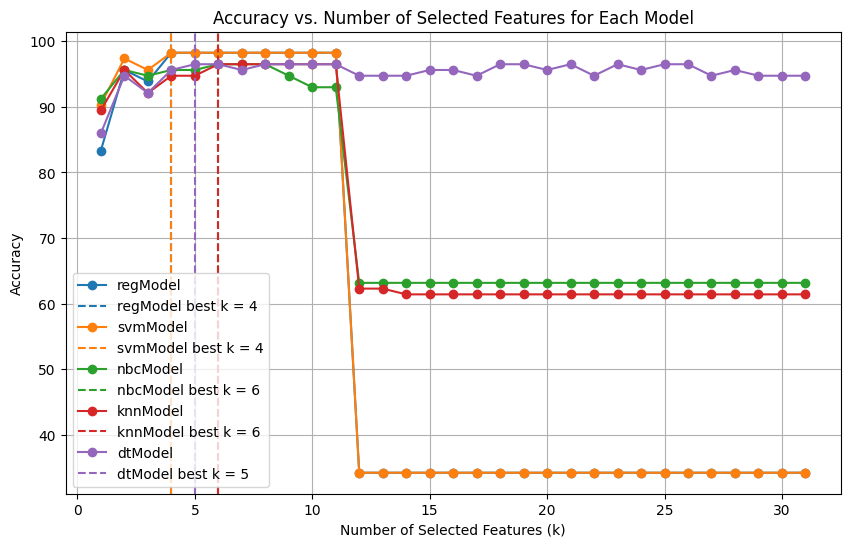

In [16]:
import matplotlib.pyplot as plt
# 05/02/2025
# OPTIMAL K GRAPHING
def kSelFeaturesGraphing(res, metric = "Accuracy", n = 30, models = ["regModel", "svmModel", "nbcModel", "knnModel", "dtModel"]):

    plt.figure(figsize=(10, 6))

    for model in models:
        k_values = list(range(1, n+1))  # k from 1 to 30
        # Get the accuracy values for this model for each k.
        acc_values = [res[k][model] for k in k_values]

        # Plot the model's performance line.
        line, = plt.plot(k_values, acc_values, marker='o', label=model)

        # Retrieve the optimal k for this model.
        optimal_k = res["kOptimal"][model]

        # Plot a vertical dashed line at the optimal k.
        plt.axvline(x=optimal_k, color=line.get_color(), linestyle='--',
                    label=f'{model} best k = {optimal_k}')

    plt.xlabel("Number of Selected Features (k)")
    plt.ylabel(metric)
    plt.title(metric + " vs. Number of Selected Features for Each Model")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
kSelFeaturesGraphing(res, n = len(df.columns) - 2, metric = "Accuracy")